<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/FDI_Remittances_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Date  FDI_Gambia   FDI_Ghana  FDI_Liberia  FDI_Nigeria     FDI_SL  \
0   2004    55526319   139270000     75351732   1874060887   61153314   
1   2005    53650280   144970000     82802111   4982533930   90731670   
2   2006    82208103   636010000    107856672   4854353979   58869144   
3   2007    78094821  1383177930    131637662   6036021405   95470171   
4   2008    70792382  2714916344    283536077   8194071895   53095068   
5   2009    39447344  2372540000    127803425   8555990007  110430203   
6   2010    37140888  2527350000   2064680994   6026253091  238404209   
7   2011    36077136  3247588000   2086006933   8841062051  950477791   
8   2012    41183458  3294520000   2309981241   7069908428  722447405   
9   2013    68340322  3227000000   1998675366   5562857987  429664580   
10  2014    23014092  3363389444    501870829   4693828632  375089629   
11  2015    71976052  3192320531    232679832   3064168904  252435829   
12  2016    69830172  3485333369    311699760   345

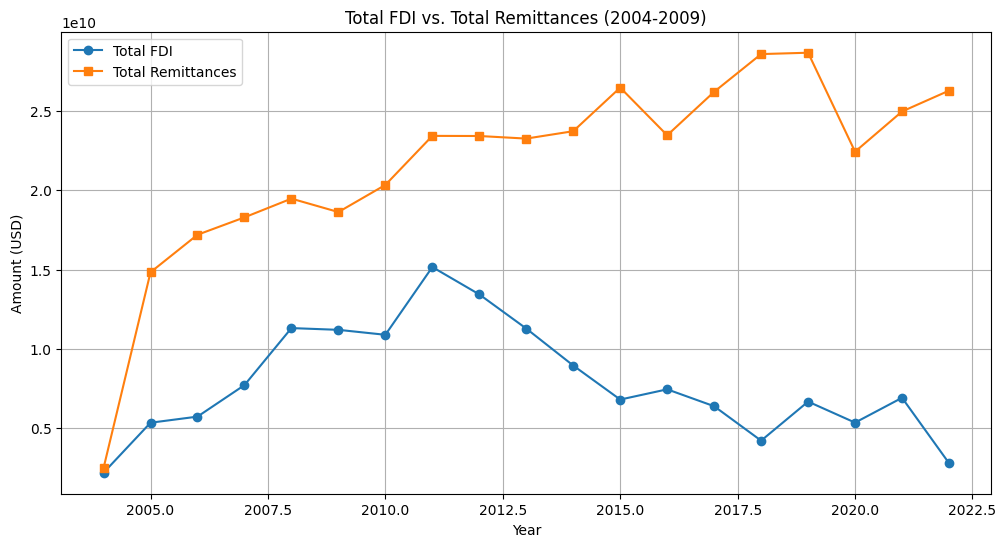


📌 **Volatility Analysis** (Higher values indicate more fluctuation):
FDI Volatility: 3426510984.1645713
Remittance Volatility: 5850523644.952306

📌 **Stationarity Test (ADF Test)** (Lower p-value indicates more persistence):
FDI ADF Statistic: -1.6211379775816501, p-value: 0.4721327501444716
Remittance ADF Statistic: -1.484844782029852, p-value: 0.5409946442932936

⚠️ FDI may not be stationary (less persistent).
⚠️ Remittances may not be stationary (less persistent).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Manually recreate the dataset based on the provided data
df_fdi_rem = pd.read_excel('/content/FDI_Remittances.xlsx')

# Create DataFrame
df = pd.DataFrame(df_fdi_rem)

# Display the DataFrame
print(df)

# Plot FDI vs. Remittances
plt.figure(figsize=(12, 6))
plt.plot(df_fdi_rem["Date"], df_fdi_rem["FDI_Total"], label="Total FDI", marker='o')
plt.plot(df_fdi_rem["Date"], df_fdi_rem["Rem_Total"], label="Total Remittances", marker='s')

# Formatting
plt.xlabel("Year")
plt.ylabel("Amount (USD)")
plt.title("Total FDI vs. Total Remittances (2004-2009)")
plt.legend()
plt.grid(True)
plt.show()

# Compute Volatility (Standard Deviation)
fdi_volatility = np.std(df_fdi_rem["FDI_Total"])
remittance_volatility = np.std(df_fdi_rem["Rem_Total"])

# Perform Augmented Dickey-Fuller (ADF) test for stationarity
adf_fdi = adfuller(df_fdi_rem["FDI_Total"])
adf_rem = adfuller(df_fdi_rem["Rem_Total"])

# Display Results
print("\n📌 **Volatility Analysis** (Higher values indicate more fluctuation):")
print(f"FDI Volatility: {fdi_volatility}")
print(f"Remittance Volatility: {remittance_volatility}")

print("\n📌 **Stationarity Test (ADF Test)** (Lower p-value indicates more persistence):")
print(f"FDI ADF Statistic: {adf_fdi[0]}, p-value: {adf_fdi[1]}")
print(f"Remittance ADF Statistic: {adf_rem[0]}, p-value: {adf_rem[1]}")

# Interpretation:
if adf_fdi[1] < 0.05:
    print("\n✅ FDI is likely stationary (persistent over time).")
else:
    print("\n⚠️ FDI may not be stationary (less persistent).")

if adf_rem[1] < 0.05:
    print("✅ Remittances are likely stationary (persistent over time).")
else:
    print("⚠️ Remittances may not be stationary (less persistent).")


In [7]:
# Perform first-order differencing to check if stationarity improves
df_fdi_rem["FDI_Diff"] = df_fdi_rem["FDI_Total"].diff()
df_fdi_rem["Rem_Diff"] = df_fdi_rem["Rem_Total"].diff()

# Drop the first row due to NaN values created by differencing
df_fdi_rem_diff = df_fdi_rem.dropna()

# Perform ADF test again on differenced data
adf_fdi_diff = adfuller(df_fdi_rem_diff["FDI_Diff"])
adf_rem_diff = adfuller(df_fdi_rem_diff["Rem_Diff"])

# Store stationarity results after differencing
stationarity_results_diff = {
    "FDI_Diff_ADF_Statistic": adf_fdi_diff[0],
    "FDI_Diff_p_value": adf_fdi_diff[1],
    "Remittance_Diff_ADF_Statistic": adf_rem_diff[0],
    "Remittance_Diff_p_value": adf_rem_diff[1]
}

# Convert results into a DataFrame
results_diff_df = pd.DataFrame([stationarity_results_diff])

# Display the results using pandas' display function instead of ace_tools
# The ace_tools library is not a standard Python library and is likely not available in your environment.
display(results_diff_df)

,FDI_Diff_ADF_Statistic,FDI_Diff_p_value,Remittance_Diff_ADF_Statistic,Remittance_Diff_p_value
0,-2.625004,0.087939,2.183865,0.998869


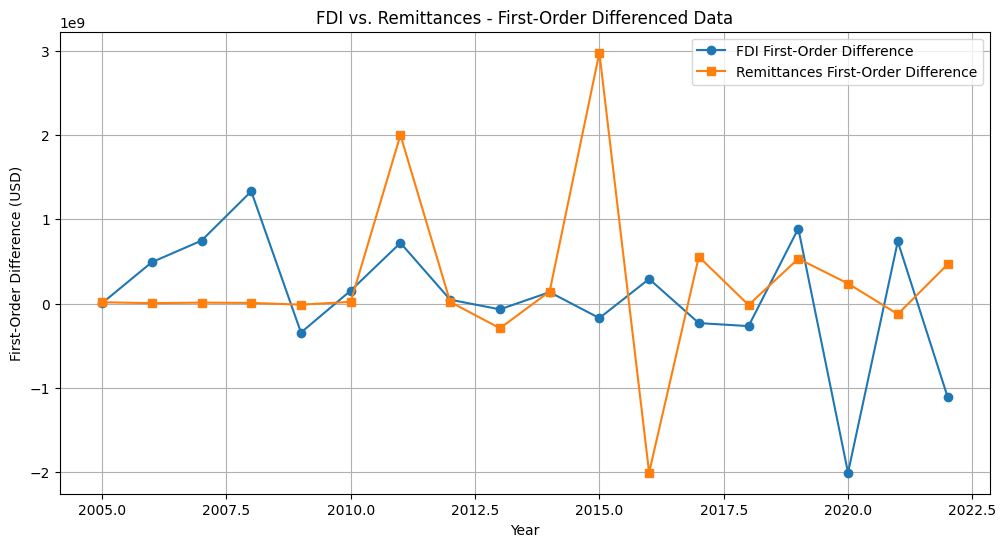

In [11]:
# Re-load necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Recreate the dataset since the previous one was lost
data_latest = {
    "Year": [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "FDI_Gambia": [55526319, 53650280, 82208103, 78094821, 70792382, 39447344, 37140888, 36077136, 41183458, 68340322, 23014092, 71976052, 69830172, 64338516, 81805007, 71083306, 189576191, 251822629, 231488000],
    "FDI_Ghana": [139270000, 144970000, 636010000, 1383177930, 2714916344, 2372540000, 2527350000, 3247588000, 3294520000, 3227000000, 3363389444, 3192320531, 3485333369, 3254990000, 2989035000, 3879831470, 1875782953, 2612789793, 1510872058],
    "FDI_Liberia": [75351732, 82802111, 107856672, 131637662, 283536077, 127803425, 2064680994, 2086006933, 2309981241, 1998675366, 501870829, 232679832, 311699760, 247842983, 129129755, 86681700, 737967947, 535582906, 960192469],
    "FDI_Nigeria": [1874060887, 4982533930, 4854353979, 6036021405, 8194071895, 8555990007, 6026253091, 8841062051, 7069908428, 5562857987, 4693828632, 3064168904, 3453258408, 2412974916, 775247400, 2305099812, 2385277666, 3313210000, -186792429],
    "FDI_SL": [61153314, 90731670, 58869144, 95470171, 53095068, 110430203, 238404209, 950477791, 722447405, 429664580, 375089629, 252435829, 138509469, 413724476, 250446054, 342400000, 172699178, 212289193, 293970573],
    "Rem_Gambia": [60748749, 59304088, 63773517, 55662540, 64811559, 79801153, 115699061, 91358954, 106349453, 109829222, 137771209, 154062368, 145678795, 160167345, 212034736, 275825107, 416418881, 547051424, 501844380],
    "Rem_Ghana": [82371200, 99184576, 105253248, 117363712, 126104704, 114455680, 135852160, 2134638607, 2155495000, 1863990000, 2007831480, 4982442362, 2979934204, 3536410000, 3520566623, 4053694729, 4291956801, 4167753824, 4632532969],
    "Rem_Liberia": [58446876, 31854956, 78814942, 61977178, 58122232, 25116904, 294231962, 523002507, 546822359, 412747709, 512000268, 654424479, 580127751, 403475873, 459924732, 346244092, 335579202, 530708601, 689738903],
    "Rem_Nigeria": [2272734507, 14640084310, 16932144079, 18014430787, 19199974036, 18370796915, 19744755063, 20616772501, 20542884460, 20797073957, 20999084800, 20626046924, 19697938004, 22037016832, 24311022416, 23809281401, 17207547306, 19483402059, 20127614151],
    "Rem_SL": [24714834, 2435105, 15622339, 41973856, 22578604, 35896004, 44218584, 58811616, 64534081, 69660699, 62430105, 48163695, 58230466, 63556890, 73207825, 177493122, 177031971, 232350067, 321604652],
}

# Create a DataFrame
df_fdi_rem = pd.DataFrame(data_latest)

# Perform first-order differencing again
df_fdi_rem["FDI_Diff"] = df_fdi_rem["FDI_Ghana"].diff()
df_fdi_rem["Rem_Diff"] = df_fdi_rem["Rem_Ghana"].diff()

# Drop the first row due to NaN values
df_fdi_rem_diff = df_fdi_rem.dropna()

# Visualizing the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_fdi_rem_diff["Year"], df_fdi_rem_diff["FDI_Diff"], label="FDI First-Order Difference", marker='o', linestyle='-')
plt.plot(df_fdi_rem_diff["Year"], df_fdi_rem_diff["Rem_Diff"], label="Remittances First-Order Difference", marker='s', linestyle='-')

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("First-Order Difference (USD)")
plt.title("FDI vs. Remittances - First-Order Differenced Data")
plt.legend()
plt.grid(True)
plt.show()

# Stationarity test for individual countries' FDI and Remittances
adf_results_countries = {}
for country in ["FDI_Gambia", "FDI_Ghana", "FDI_Liberia", "FDI_Nigeria", "FDI_SL"]:
    adf_test = adfuller(df_fdi_rem[country])
    adf_results_countries[f"{country}_ADF_Statistic"] = adf_test[0]
    adf_results_countries[f"{country}_p_value"] = adf_test[1]

for country in ["Rem_Gambia", "Rem_Ghana", "Rem_Liberia", "Rem_Nigeria", "Rem_SL"]:
    adf_test = adfuller(df_fdi_rem[country])
    adf_results_countries[f"{country}_ADF_Statistic"] = adf_test[0]
    adf_results_countries[f"{country}_p_value"] = adf_test[1]

# Convert results into a DataFrame
results_countries_df = pd.DataFrame([adf_results_countries])





In [ ]:
!pip install ace_tools # Install the package if it's necessary for your analysis

# Re-load necessary libraries since execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# ... (rest of your code) ...

# Display the results
# import ace_tools as tools  # No longer needed
# tools.display_dataframe_to_user(name="Stationarity Test for Individual Countries", dataframe=results_countries_df)
display(results_countries_df) # Using the display function from IPython.display, already imported

,FDI_Gambia_ADF_Statistic,FDI_Gambia_p_value,FDI_Ghana_ADF_Statistic,FDI_Ghana_p_value,FDI_Liberia_ADF_Statistic,FDI_Liberia_p_value,FDI_Nigeria_ADF_Statistic,FDI_Nigeria_p_value,FDI_SL_ADF_Statistic,FDI_SL_p_value,Rem_Gambia_ADF_Statistic,Rem_Gambia_p_value,Rem_Ghana_ADF_Statistic,Rem_Ghana_p_value,Rem_Liberia_ADF_Statistic,Rem_Liberia_p_value,Rem_Nigeria_ADF_Statistic,Rem_Nigeria_p_value,Rem_SL_ADF_Statistic,Rem_SL_p_value
0,1.160647,0.995702,1.165813,0.995741,-1.784697,0.388085,-1.160981,0.690152,-2.248817,0.189007,1.789044,0.998327,-0.358919,0.916735,-2.489079,0.118154,-1.597137,0.485031,2.260132,0.998928
